In [13]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# set the random seed
np.random.seed(42)

# Use the mixed state simulator to save some steps in plotting later
dev = qml.device('default.mixed', wires=1)

@qml.qnode(dev)
def not_a_haar_random_unitary():
    # Sample all parameters from their flat uniform distribution
    phi, theta, omega = 2 * np.pi * np.random.uniform(size=3)
    qml.Rot(phi, theta, omega, wires=0)
    return qml.state()

num_samples = 2021

not_haar_samples = [not_a_haar_random_unitary() for _ in range(num_samples)]

In [14]:
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# Used the mixed state simulator so we could have the density matrix for this part!
def convert_to_bloch_vector(rho):
    """Convert a density matrix to a Bloch vector."""
    ax = np.trace(np.dot(rho, X)).real
    ay = np.trace(np.dot(rho, Y)).real
    az = np.trace(np.dot(rho, Z)).real
    return [ax, ay, az]

not_haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in not_haar_samples])

/tmp/ipykernel_526446/1441829455.py:10: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


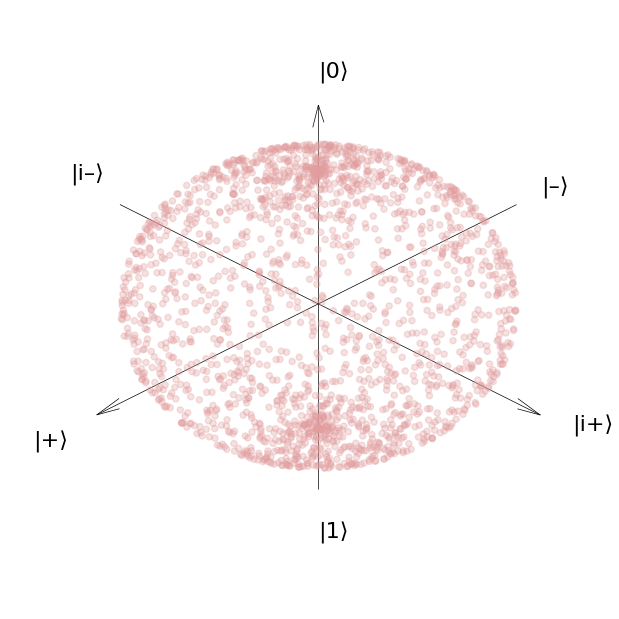

In [15]:
def plot_bloch_sphere(bloch_vectors):
    """ Helper function to plot vectors on a sphere."""
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    ax.dist = 7

    # Draw the axes (source: https://github.com/matplotlib/matplotlib/issues/13575)
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )

plot_bloch_sphere(not_haar_bloch_vectors)

/tmp/ipykernel_526446/1441829455.py:10: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


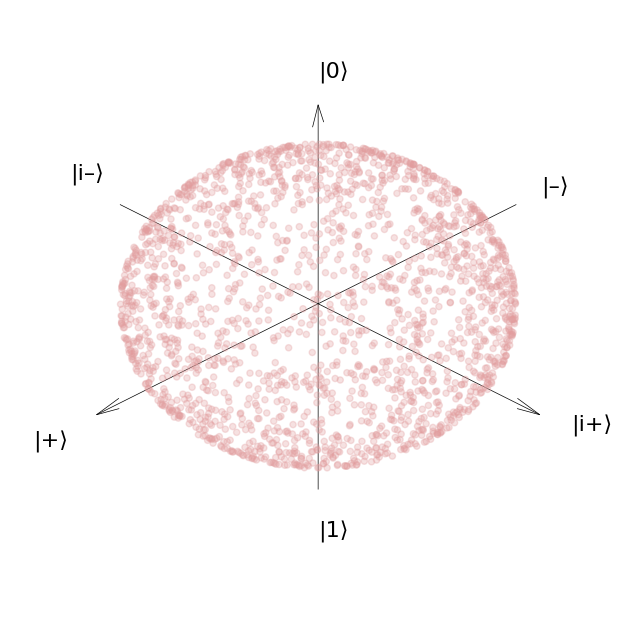

In [16]:
from scipy.stats import rv_continuous

class sin_prob_dist(rv_continuous):
    def _pdf(self, theta):
        # The 0.5 is so that the distribution is normalized
        return 0.5 * np.sin(theta)

# Samples of theta should be drawn from between 0 and pi
sin_sampler = sin_prob_dist(a=0, b=np.pi)

@qml.qnode(dev)
def haar_random_unitary():
    phi, omega = 2 * np.pi * np.random.uniform(size=2) # Sample phi and omega as normal
    theta = sin_sampler.rvs(size=1) # Sample theta from our new distribution
    qml.Rot(phi, theta, omega, wires=0)
    return qml.state()

haar_samples = [haar_random_unitary() for _ in range(num_samples)]
haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in haar_samples])

plot_bloch_sphere(haar_bloch_vectors)

/tmp/ipykernel_526446/3770039215.py:53: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


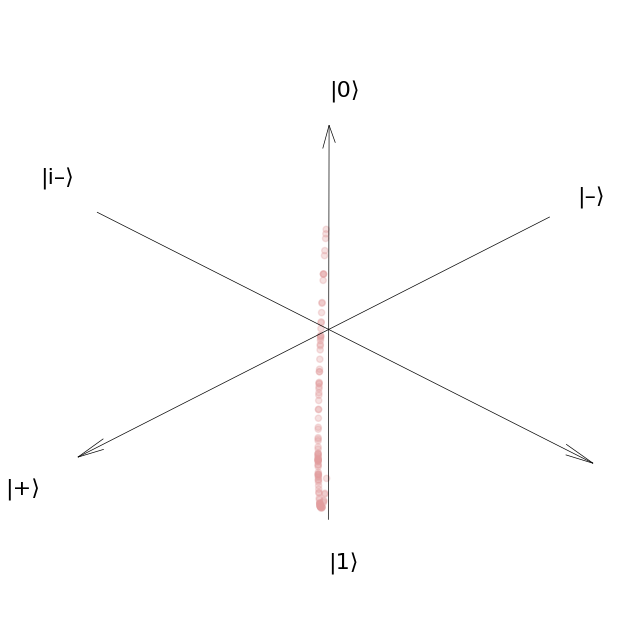

In [67]:

from scipy.stats import rv_continuous

class sin_prob_dist(rv_continuous):
    def _pdf(self, theta):
        # The 0.5 is so that the distribution is normalized
        return 0.5 * np.sin(theta)
    
# Samples of theta should be drawn from between 0 and pi
# sin_sampler = sin_prob_dist(a=0, b=np.pi)

import pennylane as qml

# Use the mixed state simulator to save some steps in plotting later
# default.qubit < default.mixed
dev = qml.device('default.mixed', wires=1)

@qml.qnode(dev)
def haar_random_unitary(phi, theta, omega):
    qml.Rot(phi, theta, 7, wires=0)
    return qml.density_matrix(wires=0)

case = 0
li = {}
rhos = []

while True : 
    case += 1
    
    phi = 2 * np.pi * np.random.uniform(0, 1)
    theta = np.arccos(1 - 2 * np.random.uniform(0, 1))
#     omega = 2 * np.pi * np.random.uniform(0, 1)
    
    rho = haar_random_unitary(phi, theta, omega)
    li[case] = [phi, theta, rho]
    rhos.append(rho)
    
    if case == 100:
         break

# print(li)

haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in rhos])

plot_bloch_sphere(haar_bloch_vectors)

/tmp/ipykernel_526446/1441829455.py:10: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


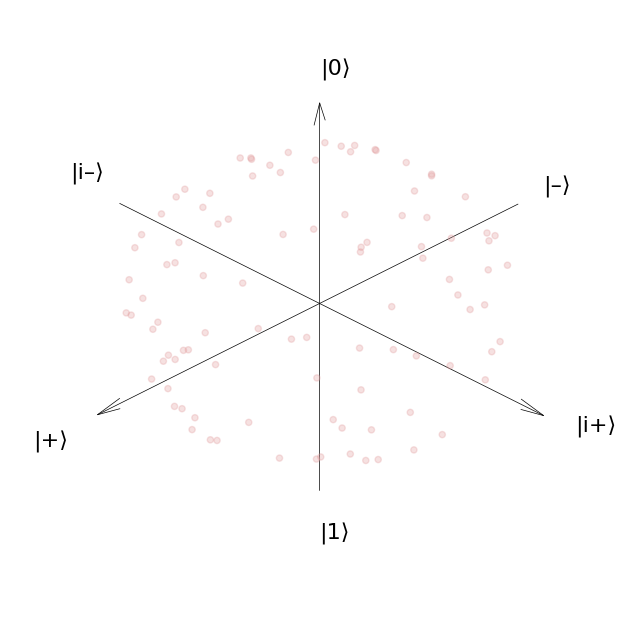

In [53]:

from scipy.stats import rv_continuous

class sin_prob_dist(rv_continuous):
    def _pdf(self, theta):
        # The 0.5 is so that the distribution is normalized
        return 0.5 * np.sin(theta)
    
# Samples of theta should be drawn from between 0 and pi
# sin_sampler = sin_prob_dist(a=0, b=np.pi)

import pennylane as qml

# Use the mixed state simulator to save some steps in plotting later
# default.qubit < default.mixed
dev = qml.device('default.mixed', wires=1)

@qml.qnode(dev)
def haar_random_unitary(phi, theta, omega):
    qml.Rot(phi, theta, omega, wires=0)
    return qml.density_matrix(wires=0)

case = 0
li = {}
rhos = []

while True : 
    case += 1
    
    phi = 2 * np.pi * np.random.uniform(0, 1)
    theta = np.arccos(1 - 2 * np.random.uniform(0, 1))
    omega = 2 * np.pi * np.random.uniform(0, 1)
    
    rho = haar_random_unitary(phi, theta, omega)
    li[case] = [phi, theta, rho]
    rhos.append(rho)
    
    if case == 100:
         break

# print(li)

haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in rhos])

plot_bloch_sphere(haar_bloch_vectors)

/tmp/ipykernel_526446/3770039215.py:53: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


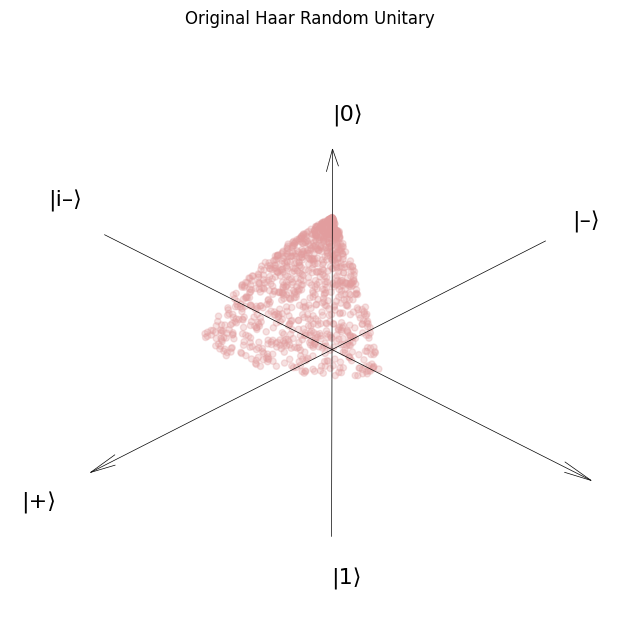

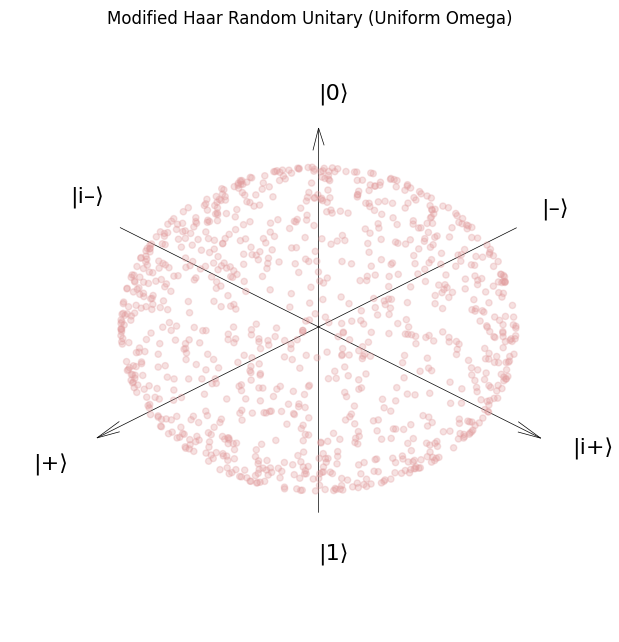

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from scipy.stats import rv_continuous
from qiskit.visualization import plot_bloch_vector
from mpl_toolkits.mplot3d import Axes3D

# Define Pauli matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

def convert_to_bloch_vector(rho):
    """Convert a density matrix to a Bloch vector."""
    ax = np.trace(np.dot(rho, X)).real
    ay = np.trace(np.dot(rho, Y)).real
    az = np.trace(np.dot(rho, Z)).real
    return [ax, ay, az]

class uniform_dist(rv_continuous):
    def _rvs(self, size, random_state=None):
        return np.random.uniform(0, 2*np.pi, size)

# Create the mixed state simulator
dev = qml.device('default.mixed', wires=1)

# Create a QNode for the Haar random unitary
@qml.qnode(dev)
def haar_random_unitary(phi, theta, omega):
    qml.Rot(phi, theta, omega, wires=0)
    return qml.density_matrix(wires=0)

# Create a QNode for the modified Haar random unitary with a uniform distribution for omega
omega_sampler = uniform_dist(a=0, b=2*np.pi)

@qml.qnode(dev)
def haar_random_unitary_uniform_phi_theta():
    phi = 2 * np.pi * np.random.uniform(0, 1)
    theta = np.arccos(1 - 2 * np.random.uniform(0, 1))
    omega = omega_sampler.rvs(size=1, random_state=None)
    qml.Rot(phi, theta, omega, wires=0)
    return qml.density_matrix(wires=0)

# Function to plot vectors on a sphere
def plot_bloch_sphere(bloch_vectors):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    ax.dist = 7

    # Draw the axes
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )

# Number of samples
num_samples = 1000

# Create and plot Bloch vectors for the original Haar random unitary
rhos_original = [haar_random_unitary(*np.random.uniform(size=3)) for _ in range(num_samples)]
bloch_vectors_original = np.array([convert_to_bloch_vector(rho) for rho in rhos_original])
plot_bloch_sphere(bloch_vectors_original)
plt.title("Original Haar Random Unitary")
plt.show()

# Create and plot Bloch vectors for the modified Haar random unitary with a uniform distribution for omega
rhos_uniform = [haar_random_unitary_uniform_phi_theta() for _ in range(num_samples)]
bloch_vectors_uniform = np.array([convert_to_bloch_vector(rho) for rho in rhos_uniform])
plot_bloch_sphere(bloch_vectors_uniform)
plt.title("Modified Haar Random Unitary (Uniform Omega)")
plt.show()
